In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Dataset Info**
- battery_power = Total energy a battery can store in one time measured in mAh
- blue = Has bluetooth or not
- clock_speed = speed at which microprocessor executes instructions
- dual_sim = Has dual sim support or not
- fc = Front Camera mega pixels
- four_g = Has 4G or not
- int_memory = Internal Memory in Gigabytes
- m_dep = Mobile Depth in cm
- mobile_wt = Weight of mobile phone
- n_cores = Number of cores of processor
- pc = Primary Camera mega pixels
- px_height = Pixel Resolution Height
- px_width = Pixel Resolution Width
- ram = Random Access Memory in Mega Bytes
- sc_h = Screen Height of mobile in cm
- sc_w = Screen Width of mobile in cm
- talk_time = longest time that a single battery charge will last when you are
- three_g = Has 3G or not
- touch_screen = Has touch screen or not
- wifi = Has wifi or not
- `price_range = This is the target variable with value of` 
                - 0 (low cost)
                - 1 (medium cost)
                - 2 (high cost)
                - 3 (very high cost)

In [ ]:
import pandas as pd
import numpy as np


import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
#df = pd.read_csv('/content/drive/My Drive/Final Project/train.csv',encoding="ISO-8859-1")
#df = pd.read_csv('/train.csv',encoding="ISO-8859-1")
df = pd.read_csv('/content/drive/My Drive/Project Dwi-Rizal MSIB Machine Learning/train.csv',encoding="ISO-8859-1")

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

# **Explorasi Data dan Visualisasi**


In [ ]:
# Check Missing Value
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
#check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# Check Duplicate Value
df.duplicated().any()

False

In [ ]:
#statistical analytics
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

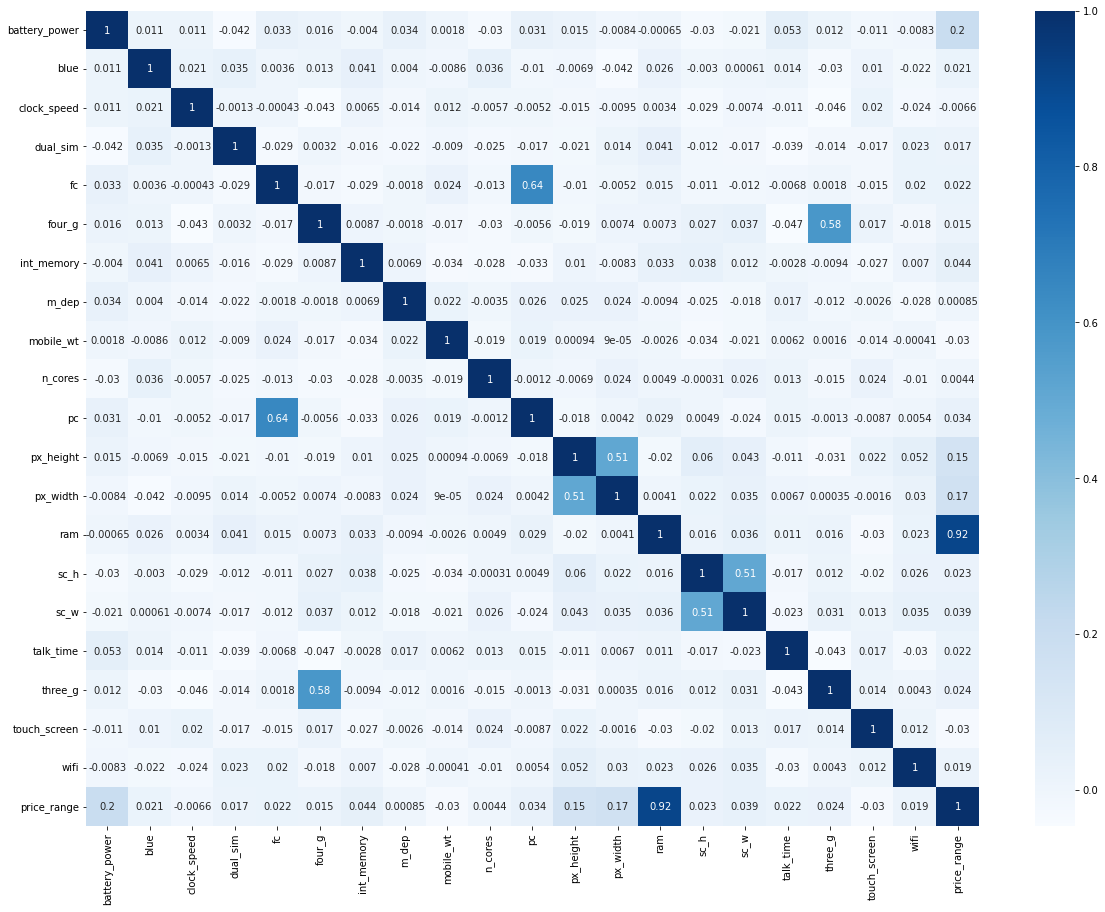

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

Hasil:
1. ram memiliki korelasi positive yang tinggi terhadap kolom target yaitu price_range
2. kolom three_g memiliki korelasi terhadap kolom four_g, karena hampir semua smartphone yang sudah support four_g pasti sudah support three_g
3. kolom pc memiliki korelasi terhadap kolom fc, karena seperti yang kita ketahui bahwa semakin tinggi megapixel yang di miliki front_camera maka semakin tinggi pula megapixel primary_camera nya
4. mobile_wt dan touch_screen memiliki korelasi negatif terbesar terhadap price_range
5. Data ini menggunakan data saat trend touchscreen belum dimulai, karena touchscreen tidak berkorelasi positif terhadap price_range.


[Text(0.5, 1.0, 'Korelasi Ram dan Rentang Harga')]

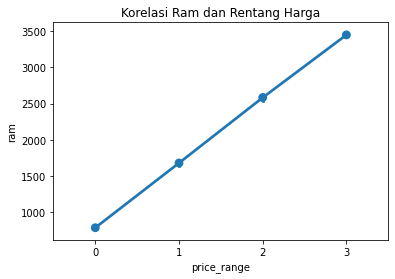

In [ ]:
sns.pointplot(y='ram',x='price_range',data=df).set(title='Korelasi Ram dan Rentang Harga')

[Text(0.5, 1.0, 'Korelasi Tenaga Baterai dan Rentang Harga')]

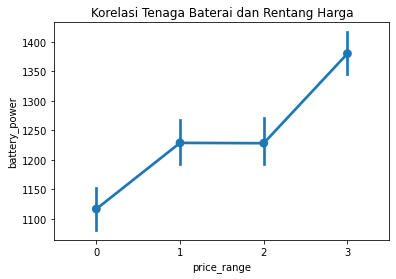

In [ ]:
sns.pointplot(x='price_range',y='battery_power',data=df).set(title='Korelasi Tenaga Baterai dan Rentang Harga')

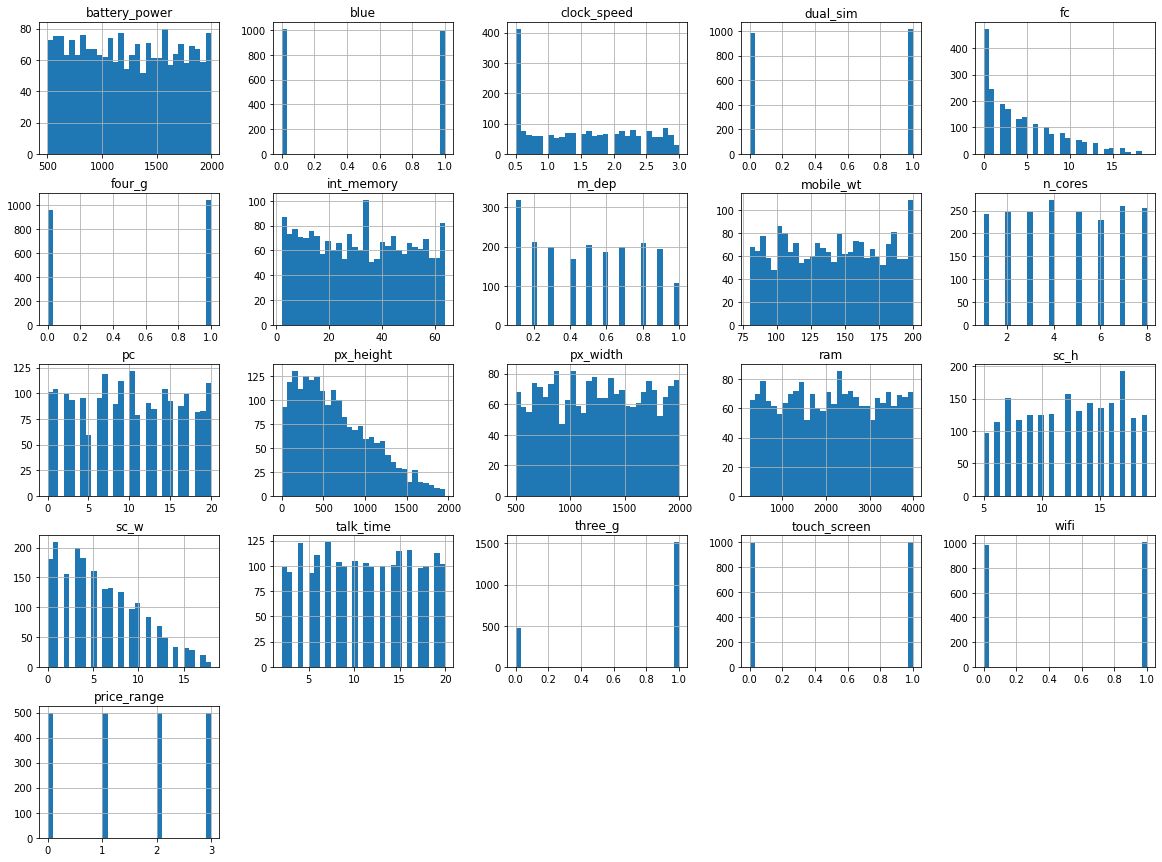

In [ ]:
df.hist(figsize=(20,15), bins=30)
plt.show()

Hasil pengamatan histogram
- Berdasarkan distribusi data tidak terdapat kejanggalan bentuk visual yang mengindikasan adanya outlier seperti kecenderungan data berbeda sendiri
- Data kategorik sudah terdistribusi merata dan tidak ada yang berbeda atau dalam bentuk koma/desimal

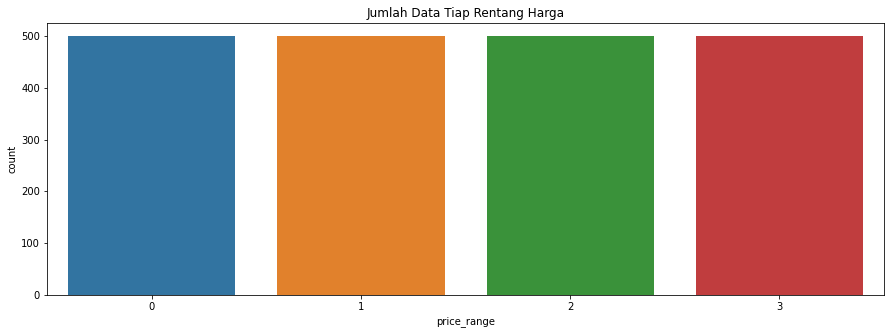

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x=df["price_range"]).set(title='Jumlah Data Tiap Rentang Harga')
plt.show()

Hasil: <br>
Jumlah data pada masing - masing categori yang terdapat pada kolom price_range sama banyaknya

#### Univariate

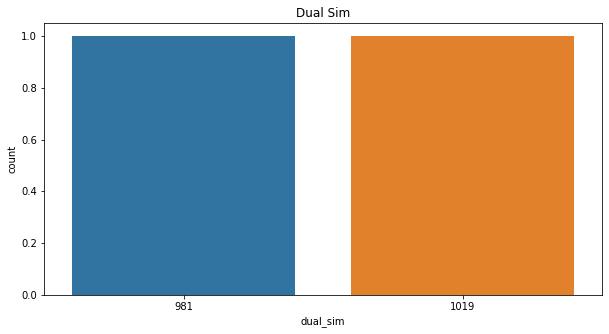

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df["dual_sim"].value_counts())
plt.title("Dual Sim")
plt.show()

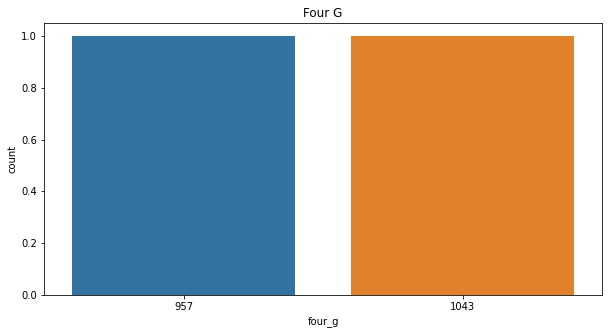

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df["four_g"].value_counts())
plt.title("Four G")
plt.show()

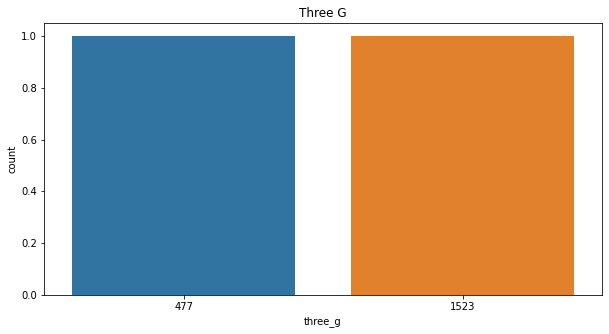

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df["three_g"].value_counts())
plt.title("Three G")
plt.show()

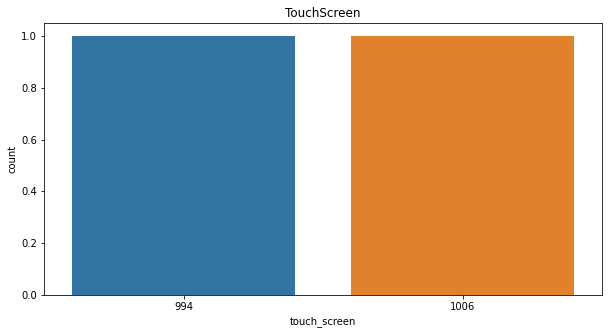

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df["touch_screen"].value_counts())
plt.title("TouchScreen")
plt.show()

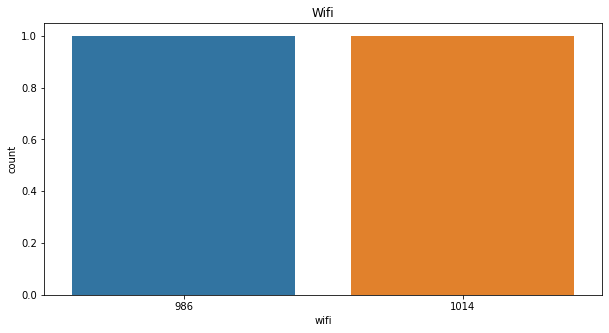

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df["wifi"].value_counts())
plt.title("Wifi")
plt.show()

#### Bivariate

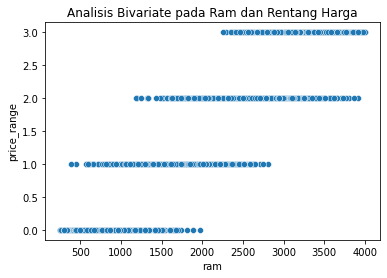

In [ ]:
fig = plt.figure()  
ax = sns.scatterplot(data = df, x='ram', y = 'price_range').set(title='Analisis Bivariate pada Ram dan Rentang Harga')
plt.show() 

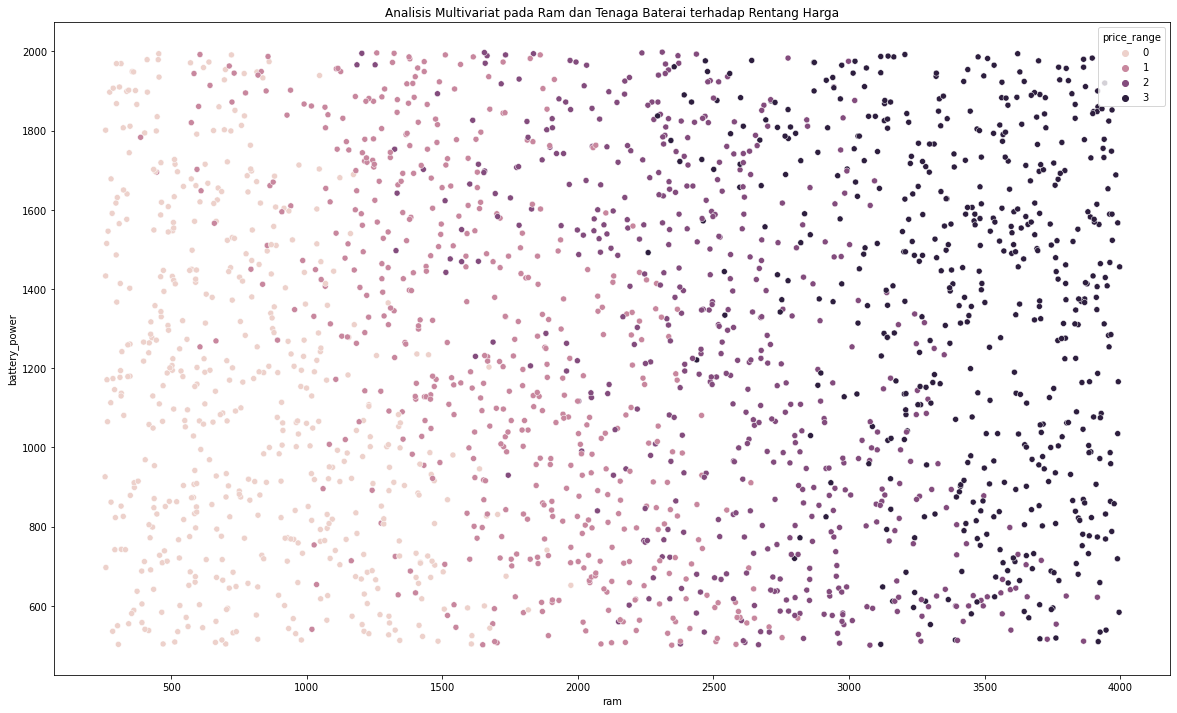

In [ ]:
plt.figure(figsize=(20, 12))
sns.scatterplot(data = df, x = df['ram'], y = 'battery_power', hue='price_range').set(title='Analisis Multivariat pada Ram dan Tenaga Baterai terhadap Rentang Harga')
plt.show() 

[Text(0.5, 1.0, 'Analisis Multivariat Dimensi Layar terhadap Rentang Harga')]

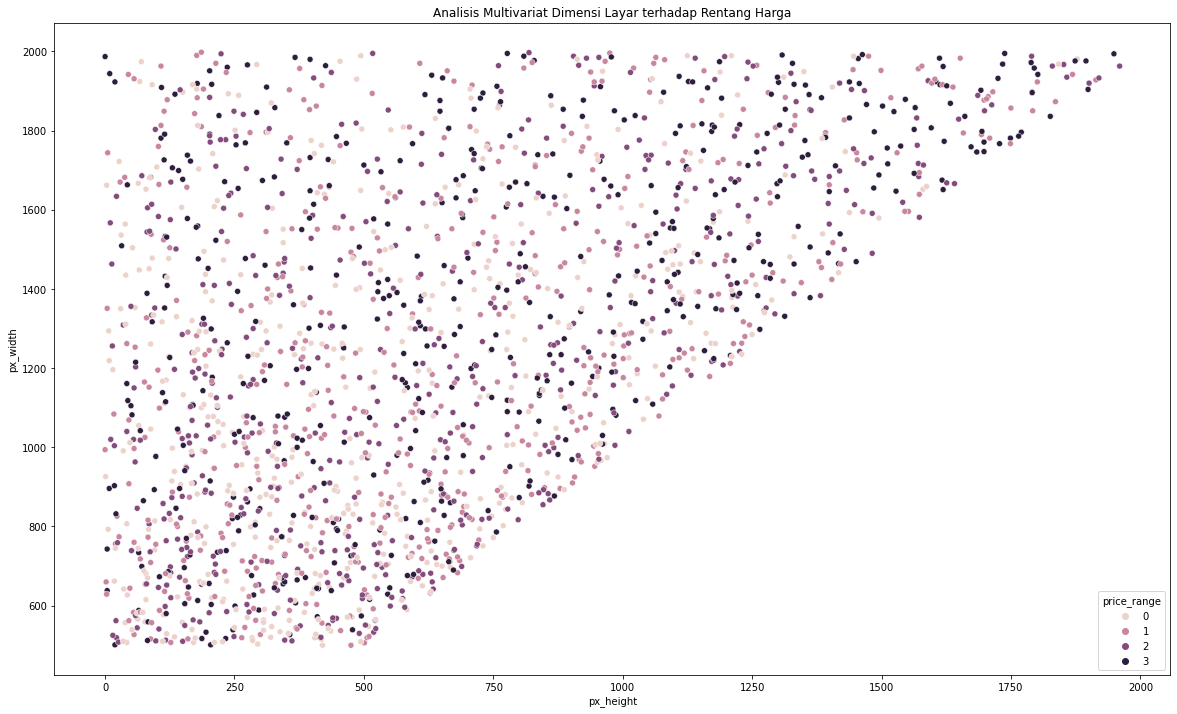

In [ ]:
plt.figure(figsize=(20, 12))
sns.scatterplot(data = df, x = df['px_height'], y = 'px_width', hue='price_range').set(title='Analisis Multivariat Dimensi Layar terhadap Rentang Harga')

# **Modelling**

### Normalisasi Menggunakan StandarScaler


In [ ]:
dfx_train = df.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [ ]:
std_scaler = StandardScaler()

for column in ['battery_power','int_memory','mobile_wt','px_height','px_width','ram']:
    df[column] = std_scaler.fit_transform(df[column].values.reshape(-1,1))

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,0,2.2,0,1,0,-1.380644,0.6,1.349249,2,2,-1.408949,-1.146784,0.391703,9,7,19,0,0,1,1
1,-0.495139,1,0.5,1,0,1,1.155024,0.7,-0.120059,3,6,0.585778,1.704465,0.467317,17,3,7,1,1,0,2
2,-1.537686,1,0.5,1,2,1,0.493546,0.9,0.134244,5,6,1.392684,1.074968,0.441498,11,2,9,1,1,0,2
3,-1.419319,1,2.5,0,0,0,-1.215274,0.8,-0.261339,6,9,1.286750,1.236971,0.594569,16,8,11,1,0,0,2
4,1.325906,1,1.2,0,13,1,0.658915,0.6,0.021220,2,14,1.268718,-0.091452,-0.657666,8,2,15,1,1,0,1


###  Train Test Split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price_range', axis = 1), df['price_range'], test_size = 0.30, random_state = 141)

In [ ]:
X2_train,X2_test, y2_train, y2_test = train_test_split(dfx_train.drop('price_range',axis = 1), dfx_train['price_range'], test_size = 0.30, random_state = 141)

### Models and Tuning

In [ ]:
model_score = pd.DataFrame(columns = ('Accuracy', 'rmse'))

In [ ]:
MODEL,MODEL2 = [],[]
TEST,TEST2 = [],[]

def eval(model,test1, test2):
    MODEL.append(model)
    TEST.append(round(test1,2))
    TEST2.append(round(test2,2))

#### Model ke 1 - Logistic Regression

##### Logistic Regression Dengan Normalisasi

In [ ]:
model_score = pd.DataFrame(columns = ('Accuracy', 'rmse'))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
import math

In [ ]:
lrmodel = LogisticRegression()
lrmodel.fit(X_train, y_train)
lrmodel.score(X_test,y_test)

0.9283333333333333

In [ ]:
y_test_pred = lrmodel.predict(X_test)
y_train_pred = lrmodel.predict(X_train)

In [ ]:
lr_train_acc=accuracy_score(y_train_pred,y_train)*100
lr_test_acc=accuracy_score(y_test_pred,y_test)*100

In [ ]:
print("Train Set Accuracy:"+str(lr_train_acc))
print("Test Set Accuracy:"+str(lr_test_acc))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:94.07142857142857
Test Set Accuracy:92.83333333333333

Confusion Matrix:
[[158   4   0   0]
 [ 12 126   9   0]
 [  0   5 136   5]
 [  0   0   8 137]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       162
           1       0.93      0.86      0.89       147
           2       0.89      0.93      0.91       146
           3       0.96      0.94      0.95       145

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



##### Logistic Regression Tanpa Normalisasi

In [ ]:
lrmodel2 = LogisticRegression()
lrmodel2.fit(X2_train, y2_train)
lrmodel2.score(X2_test, y2_test)

0.6516666666666666

In [ ]:
y_test_pred_tn = lrmodel2.predict(X2_test)
y_train_pred_tn = lrmodel2.predict(X2_train)

In [ ]:
lr2_train_acc=accuracy_score(y_train_pred_tn,y2_train)*100
lr2_test_acc=accuracy_score(y_test_pred_tn,y2_test)*100

In [ ]:
print("Train Set Accuracy:"+str(lr2_train_acc))
print("Test Set Accuracy:"+str(lr2_test_acc))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred_tn,y2_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred_tn,y2_test))
eval("Logistic Regression",lr_test_acc,lr2_test_acc)

Train Set Accuracy:63.57142857142857
Test Set Accuracy:65.16666666666666

Confusion Matrix:
[[134  16   1   0]
 [ 34  82  36   1]
 [  2  29  71  37]
 [  0   8  45 104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       151
           1       0.61      0.54      0.57       153
           2       0.46      0.51      0.49       139
           3       0.73      0.66      0.70       157

    accuracy                           0.65       600
   macro avg       0.65      0.65      0.65       600
weighted avg       0.65      0.65      0.65       600



#### Model ke 2 - Naive Bayes

##### Naive Bayes Dengan Normalisasi

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [ ]:
naiveb = GaussianNB()
naiveb.fit(X_train, y_train)
naiveb.score(X_test, y_test)

0.8133333333333334

In [ ]:
y_test_pred1 = naiveb.predict(X_test)
y_train_pred1=naiveb.predict(X_train)

naiveb_train_acc=accuracy_score(y_train_pred1,y_train)*100
naiveb_test_acc=accuracy_score(y_test_pred1,y_test)*100

In [ ]:
print("Train Set Accuracy:"+str(naiveb_train_acc))
print("Test Set Accuracy:"+str(naiveb_test_acc))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred1,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

Train Set Accuracy:82.28571428571428
Test Set Accuracy:81.33333333333333

Confusion Matrix:
[[157   9   0   0]
 [ 13  98  34   1]
 [  0  28 106  14]
 [  0   0  13 127]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       166
           1       0.73      0.67      0.70       146
           2       0.69      0.72      0.70       148
           3       0.89      0.91      0.90       140

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



##### Naive Bayes Tanpa Normalisasi

In [ ]:
naiveb2 = GaussianNB()
naiveb2.fit(X2_train, y2_train)
naiveb2.score(X2_test, y2_test)

0.815

In [ ]:
y_test_pred1_tn = naiveb2.predict(X2_test)
y_train_pred1_tn =naiveb2.predict(X2_train)

naiveb2_train_acc=accuracy_score(y_train_pred1_tn,y2_train)*100
naiveb2_test_acc=accuracy_score(y_test_pred1_tn,y2_test)*100

In [ ]:
print("Train Set Accuracy:"+str(naiveb2_train_acc))
print("Test Set Accuracy:"+str(naiveb2_test_acc))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred1_tn,y2_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1_tn,y2_test))
eval("Naive Bayes",naiveb_test_acc,naiveb2_test_acc)

Train Set Accuracy:82.35714285714286
Test Set Accuracy:81.5

Confusion Matrix:
[[157   9   0   0]
 [ 13  98  33   1]
 [  0  28 107  14]
 [  0   0  13 127]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       166
           1       0.73      0.68      0.70       145
           2       0.70      0.72      0.71       149
           3       0.89      0.91      0.90       140

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



#### Model ke 3 - K-Nearest Neighbour (KNN)

##### K-Nearest Neighbour (KNN) Dengan Normalisasi

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.315

In [ ]:
y_test_pred3 = knn.predict(X_test)
y_train_pred3 =knn.predict(X_train)

knn_train_acc=accuracy_score(y_train_pred3,y_train)*100
knn_test_acc=accuracy_score(y_test_pred3,y_test)*100

In [ ]:
print("Train Set Accuracy:"+str(knn_train_acc))
print("Test Set Accuracy:"+str(knn_test_acc))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Train Set Accuracy:54.714285714285715
Test Set Accuracy:31.5

Confusion Matrix:
[[71 49 25 16]
 [62 38 48 40]
 [25 31 44 50]
 [12 17 36 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.44      0.43       161
           1       0.28      0.20      0.24       188
           2       0.29      0.29      0.29       150
           3       0.25      0.36      0.30       101

    accuracy                           0.32       600
   macro avg       0.31      0.32      0.31       600
weighted avg       0.31      0.32      0.31       600



##### K-Nearest Neighbour (KNN) Tanpa Normalisasi

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 8)
knn2.fit(X2_train, y2_train)
knn2.score(X2_test, y2_test)

0.9183333333333333

In [ ]:
y_test_pred3_tn = knn2.predict(X2_test)
y_train_pred3_tn =knn2.predict(X2_train)

knn2_train_acc_tn=accuracy_score(y_train_pred3_tn,y2_train)*100
knn2_test_acc_tn=accuracy_score(y_test_pred3_tn,y2_test)*100

In [ ]:
print("Train Set Accuracy:"+str(knn2_train_acc_tn))
print("Test Set Accuracy:"+str(knn2_test_acc_tn))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3_tn,y2_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3_tn,y2_test))
eval(" K-Nearest Neighbour (KNN)",knn_test_acc,knn2_test_acc_tn)

Train Set Accuracy:94.71428571428572
Test Set Accuracy:91.83333333333333

Confusion Matrix:
[[166   6   0   0]
 [  4 128  15   0]
 [  0   1 132  17]
 [  0   0   6 125]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       172
           1       0.95      0.87      0.91       147
           2       0.86      0.88      0.87       150
           3       0.88      0.95      0.92       131

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



##### Menentukan K Optimal menggunakan Elbow Method

In [ ]:
error_rate = []

for i in range(1,40):
    knnx = KNeighborsClassifier(n_neighbors = i)
    knnx.fit(X2_train, y2_train)
    pred_i = knnx.predict(X2_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

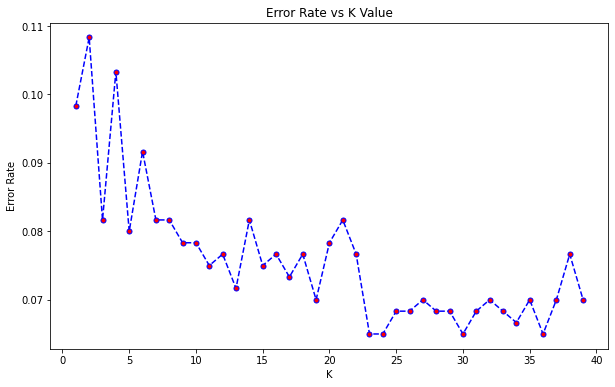

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o',
        markerfacecolor = 'red', markersize = 5);
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

#### Model 4 - Decission Tree

##### Decission Tree Dengan Normalisasi

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.835

In [ ]:
y_test_pred4 = dt.predict(X_test)
y_train_pred4 = dt.predict(X_train)

dt_train_acc=accuracy_score(y_train_pred4,y_train)*100
dt_test_acc=accuracy_score(y_test_pred4,y_test)*100

In [ ]:
print("Train Set Accuracy:"+str(dt_train_acc))
print("Test Set Accuracy:"+str(dt_test_acc))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred4,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred4,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:83.5

Confusion Matrix:
[[145   5   0   0]
 [ 25 111  10   1]
 [  0  19 124  20]
 [  0   0  19 121]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       150
           1       0.82      0.76      0.79       147
           2       0.81      0.76      0.78       163
           3       0.85      0.86      0.86       140

    accuracy                           0.83       600
   macro avg       0.83      0.84      0.83       600
weighted avg       0.83      0.83      0.83       600



##### Decission Tree Tanpa Normalisasi

In [ ]:
dt2 = DecisionTreeClassifier()
dt2 = dt2.fit(X2_train, y2_train)
dt2.score(X2_test, y2_test)

0.85

In [ ]:
y_test_pred4_tn = dt2.predict(X2_test)
y_train_pred4_tn = dt2.predict(X2_train)

dt2_train_acc=accuracy_score(y_train_pred4_tn,y2_train)*100
dt2_test_acc=accuracy_score(y_test_pred4_tn,y2_test)*100

In [ ]:
print("Train Set Accuracy:"+str(dt2_train_acc))
print("Test Set Accuracy:"+str(dt2_test_acc))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred4_tn,y2_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred4_tn,y2_test))
eval("Decission Tree",dt_test_acc,dt2_test_acc)

Train Set Accuracy:100.0
Test Set Accuracy:85.0

Confusion Matrix:
[[146   7   0   0]
 [ 24 116  10   1]
 [  0  12 126  19]
 [  0   0  17 122]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       153
           1       0.86      0.77      0.81       151
           2       0.82      0.80      0.81       157
           3       0.86      0.88      0.87       139

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



#### Model 5 - Random Forest

##### Random Forest Dengan Normalisasi

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfclf = RandomForestClassifier(n_estimators = 100)
rfclf.fit(X_train, y_train)
rfclf.score(X_test, y_test)

0.8866666666666667

In [ ]:
y_test_pred5 = rfclf.predict(X_test)
y_train_pred5 = rfclf.predict(X_train)

rfclf_train_acc=accuracy_score(y_train_pred5,y_train)*100
rfclf_test_acc = accuracy_score(y_test_pred5,y_test)*100

In [ ]:
print("Train Set Accuracy:"+str(rfclf_train_acc))
print("Test Set Accuracy:"+str(rfclf_test_acc))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred5,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred5,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:88.66666666666667

Confusion Matrix:
[[159   5   0   0]
 [ 11 121  24   0]
 [  0   9 120  10]
 [  0   0   9 132]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       164
           1       0.90      0.78      0.83       156
           2       0.78      0.86      0.82       139
           3       0.93      0.94      0.93       141

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.88       600
weighted avg       0.89      0.89      0.89       600



##### Random Forest Tanpa Normalisasi

In [ ]:
rfclf2 = RandomForestClassifier(n_estimators = 100)
rfclf2.fit(X2_train, y2_train)
rfclf2.score(X2_test, y2_test)

0.8766666666666667

In [ ]:
y_test_pred5_tn = rfclf2.predict(X2_test)
y_train_pred5_tn = rfclf2.predict(X2_train)

rfclf2_train_acc=accuracy_score(y_train_pred5_tn,y2_train)*100
rfclf2_test_acc = accuracy_score(y_test_pred5_tn,y2_test)*100

In [ ]:
print("Train Set Accuracy:"+str(rfclf2_train_acc))
print("Test Set Accuracy:"+str(rfclf2_test_acc))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred5_tn,y2_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred5_tn,y2_test))
eval("Random Forest",rfclf_test_acc,rfclf2_test_acc)

Train Set Accuracy:100.0
Test Set Accuracy:87.66666666666667

Confusion Matrix:
[[156   7   0   0]
 [ 14 116  18   0]
 [  0  12 123  11]
 [  0   0  12 131]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       163
           1       0.86      0.78      0.82       148
           2       0.80      0.84      0.82       146
           3       0.92      0.92      0.92       143

    accuracy                           0.88       600
   macro avg       0.88      0.87      0.87       600
weighted avg       0.88      0.88      0.88       600



#### Model 6 - Support Vector Machine (SVM)


##### Support Vector Machine (SVM) Dengan Normalisasi

In [ ]:
from sklearn import svm

In [ ]:
clf  = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.945

In [ ]:
y_test_pred6 = clf.predict(X_test)
y_train_pred6 = clf.predict(X_train)

clf_train_acc=accuracy_score(y_train_pred6,y_train)*100
clf_test_acc = accuracy_score(y_test_pred6,y_test)*100

In [ ]:
print("Train Set Accuracy:"+str(clf_train_acc))
print("Test Set Accuracy:"+str(clf_test_acc))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred6,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred6,y_test))

Train Set Accuracy:97.71428571428571
Test Set Accuracy:94.5

Confusion Matrix:
[[161   2   0   0]
 [  9 128   7   0]
 [  0   5 142   6]
 [  0   0   4 136]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       163
           1       0.95      0.89      0.92       144
           2       0.93      0.93      0.93       153
           3       0.96      0.97      0.96       140

    accuracy                           0.94       600
   macro avg       0.95      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



##### Support Vector Machine (SVM) Tanpa Normalisasi

In [ ]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X2_train, y2_train)
clf2.score(X2_test, y2_test)

0.96

In [ ]:
y_test_pred6_tn = clf2.predict(X2_test)
y_train_pred6_tn = clf2.predict(X2_train)

clf2_train_acc=accuracy_score(y_train_pred6_tn,y2_train)*100
clf2_test_acc = accuracy_score(y_test_pred6_tn,y2_test)*100

In [ ]:
print("Train Set Accuracy:"+str(clf2_train_acc))
print("Test Set Accuracy:"+str(clf2_test_acc))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred6_tn,y2_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred6_tn,y2_test))
eval("Support Vector Machine (SVM)",clf_test_acc,clf2_test_acc)

Train Set Accuracy:99.85714285714286
Test Set Accuracy:96.0

Confusion Matrix:
[[165   2   0   0]
 [  5 130   5   0]
 [  0   3 147   8]
 [  0   0   1 134]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       167
           1       0.96      0.93      0.95       140
           2       0.96      0.93      0.95       158
           3       0.94      0.99      0.97       135

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



#### Model ke 7 - Adabost Classifier

##### Adabost Classifier Dengan Normalisasi

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:

ada = AdaBoostClassifier(base_estimator = dt)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [ ]:
grid_search.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 10, 'n_estimators': 180}

In [ ]:
grid_search.best_score_

0.8271428571428571

In [ ]:
ad = grid_search.best_estimator_
ad.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=10,
                   n_estimators=180)

In [ ]:
y_pred = ad.predict(X_test)

In [ ]:
ada_train_acc = accuracy_score(y_train, ad.predict(X_train))*100
ada_test_acc = accuracy_score(y_test, y_pred)*100

print(f"Training Accuracy of Random Forest Model is {ada_train_acc}")
print(f"Test Accuracy of Random Forest Model is {ada_test_acc}")

Training Accuracy of Random Forest Model is 100.0
Test Accuracy of Random Forest Model is 84.16666666666667


##### Adabost Classifier Tanpa Normalisasi

In [ ]:
parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X2_train, y2_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [ ]:
grid_search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 50}

In [ ]:
grid_search.best_score_

0.8257142857142858

In [ ]:
ad = grid_search.best_estimator_
ad.fit(X2_train,y2_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   learning_rate=1)

In [ ]:
y2_pred = ad.predict(X2_test)


In [ ]:
ada_train_acc2 = accuracy_score(y2_train, ad.predict(X2_train))*100
ada_test_acc2 = accuracy_score(y2_test, y2_pred)*100

print(f"Training Accuracy of Random Forest Model is {ada_train_acc2}")
print(f"Test Accuracy of Random Forest Model is {ada_test_acc2}") 
eval("Adabost Classifier",ada_test_acc,ada_test_acc2)

Training Accuracy of Random Forest Model is 100.0
Test Accuracy of Random Forest Model is 84.16666666666667


#### Model ke 8 - Gradient Boosting Classifier

##### Gradient Boosting Classifier Dengan Normalisasi

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.8916666666666667

In [ ]:
y_test_pred8 = gbc.predict(X_test)
y_train_pred8=gbc.predict(X_train)
gbc_train_acc=accuracy_score(y_train_pred8,y_train)*100
gbc_test_acc=accuracy_score(y_test_pred8,y_test)*100

In [ ]:
print("Train Set Accuracy:"+str(gbc_train_acc))
print("Test Set Accuracy:"+str(gbc_test_acc))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred8,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred8,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:89.16666666666667

Confusion Matrix:
[[157   6   0   0]
 [ 13 120  13   0]
 [  0   9 131  15]
 [  0   0   9 127]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       163
           1       0.89      0.82      0.85       146
           2       0.86      0.85      0.85       155
           3       0.89      0.93      0.91       136

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



##### Gradient Boosting Classifier Tanpa Normalisasi

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X2_train, y2_train)
gbc.score(X2_test, y2_test)

0.89

In [ ]:
y_test_pred8_tn = gbc.predict(X2_test)
y_train_pred8_tn=gbc.predict(X2_train)
gbc2_train_acc=accuracy_score(y_train_pred8_tn,y_train)*100
gbc2_test_acc=accuracy_score(y_test_pred8_tn,y_test)*100

In [ ]:
print("Train Set Accuracy:"+str(gbc2_train_acc))
print("Test Set Accuracy:"+str(gbc2_test_acc))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred8_tn,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred8_tn,y_test))
eval("Gradient Boosting Classifier",gbc_test_acc,gbc2_test_acc)

Train Set Accuracy:100.0
Test Set Accuracy:89.0

Confusion Matrix:
[[157   7   0   0]
 [ 13 119  13   0]
 [  0   9 131  15]
 [  0   0   9 127]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       164
           1       0.88      0.82      0.85       145
           2       0.86      0.85      0.85       155
           3       0.89      0.93      0.91       136

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



#### Model ke 9 - XGBClassifier

#####  XGBClassifier Dengan Normalisasi

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 10,gamma=5)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.845

In [ ]:
y_test_pred9 = xgb.predict(X_test)
y_train_pred9=xgb.predict(X_train)
xgb_train_acc=accuracy_score(y_train_pred9,y_train)*100
xgb_test_acc= accuracy_score(y_test_pred9,y_test)*100

In [ ]:
print("Train Set Accuracy:"+str(xgb_train_acc))
print("Test Set Accuracy:"+str(xgb_test_acc))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred9,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred9,y_test))

Train Set Accuracy:92.07142857142857
Test Set Accuracy:84.5

Confusion Matrix:
[[150  14   0   0]
 [ 20 110  19   0]
 [  0  11 120  15]
 [  0   0  14 127]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       164
           1       0.81      0.74      0.77       149
           2       0.78      0.82      0.80       146
           3       0.89      0.90      0.90       141

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



##### XGBClassifier Tanpa Normalisasi

In [ ]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 10,gamma=5)
xgb.fit(X2_train, y2_train)
xgb.score(X2_test, y2_test)

0.845

In [ ]:
y_test_pred9_tn = xgb.predict(X2_test)
y_train_pred9_tn=xgb.predict(X2_train)
xgb2_train_acc=accuracy_score(y_train_pred9_tn,y_train)*100
xgb2_test_acc= accuracy_score(y_test_pred9_tn,y_test)*100

In [ ]:
print("Train Set Accuracy:"+str(xgb_train_acc))
print("Test Set Accuracy:"+str(xgb_test_acc))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred9_tn,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred9_tn,y_test))
eval("XGBClassifier",xgb_test_acc,xgb_test_acc)

Train Set Accuracy:92.07142857142857
Test Set Accuracy:84.5

Confusion Matrix:
[[150  14   0   0]
 [ 20 110  19   0]
 [  0  11 120  15]
 [  0   0  14 127]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       164
           1       0.81      0.74      0.77       149
           2       0.78      0.82      0.80       146
           3       0.89      0.90      0.90       141

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



# **Conclusion**

In [ ]:
print("\t\t\tTest Accuracy")
results2 = pd.DataFrame({ 'Model': MODEL,
                         'Dengan Normalisasi': TEST,
                         'Tanpa Normalisasi': TEST2 })

results2.sort_values(by='Dengan Normalisasi',ascending=False)

			Test Accuracy


,Model,Dengan Normalisasi,Tanpa Normalisasi
5,Support Vector Machine (SVM),94.50,96.00
0,Logistic Regression,92.83,65.17
7,Gradient Boosting Classifier,89.17,89.00
4,Random Forest,88.67,87.67
8,XGBClassifier,84.50,84.50
6,Adabost Classifier,84.17,84.17
3,Decission Tree,83.50,85.00
1,Naive Bayes,81.33,81.50
2,K-Nearest Neighbour (KNN),31.50,91.83


##### Interesting Insights
- Model yang terbaik dari 9 model sudah di coba adalah Support Vector Machine (SVM), karena memiliki akurasi tertinggi pada data test sebesar 94.5%, selain itu rentang akurasi pada data train dan data test tidak terlalu jauh yaitu sebesar 97.71% dan 94.5%, perbedaanya hanya sekitar 3% saja, selain itu nilai recal pada model Support Vector Machine (SVM) itu yang tertinggi dibandingkan dengan model lain, yang artinya tingkat keberhasilan model dalam memprediksi sebuah data menjadi yang tertinggi
- Faktor yang paling mempengaruhi price_range dari sebuah smartphone adalah ram dan battery_power, karena semakin besar dari sebuah ram dan battery_power maka price_range nya juga akan semakin tinggi, namun fitur yang paling besar berpengaruh terhadap price_range adalah ram 

##### Rekomendasi
- jika hendak membeli smartphone yang harganya murah, maka pilihlah smartphone yang memiliki kapasitas ram yang sedikit, begitu pula sebaliknya jika hendak membeli smartphone yang harganya mahal, maka pilihlah smartphone yang memiliki kapasitas ram yang besar

# **Semi Deployment** (Hasil Rekomendasi)

Model untuk deployment adalah SVM tanpa normalisasi.

In [ ]:
def prediksinya(nilai):
  dataprediksi = np.array([nilai])
  dataprediksi = dataprediksi.reshape(1, -1)
  datatest = pd.DataFrame(dataprediksi)

  prediksi = clf2.predict(datatest)
  if prediksi == 1:
    print("Mobile anda diprediksi tergolong ke dalam harga murah")
  elif prediksi == 2:
    print("Mobile anda diprediksi tergolong ke dalam harga menengah")
  elif prediksi == 3:
        print("Mobile anda diprediksi tergolong ke dalam harga mahal")
  elif prediksi == 1:
    print("Mobile anda diprediksi tergolong ke dalam harga sangat mahal")

In [ ]:
hasilinput = []

num = int(input("Masukkan Tenaga Baterai : "))
hasilinput.append(num)
num = int(input("Apakah Mobilennya bluetooth? jawab 1 untuk Ya, dan 0 untuk Tidak : "))
hasilinput.append(num)
num = float(input("Masukkan Clock Speednya : "))
hasilinput.append(num)
num = int(input("Apakah Mobilennya mempunyai dual sim? jawab 1 untuk Ya, dan 0 untuk Tidak : "))
hasilinput.append(num)
num = int(input("Berapa megapixel kamera depanya? : "))
hasilinput.append(num)
num = int(input("Apakah Mobilennya mempunyai jaringan 4G? jawab 1 untuk Ya, dan 0 untuk Tidak : "))
hasilinput.append(num)
num = int(input("Berapa memori internalnya? : "))
hasilinput.append(num)
num = float(input("Berapa kedalaman (mobile deph)? : "))
hasilinput.append(num)
num = int(input("Berapa berat mobilenya? : "))
hasilinput.append(num)
num = int(input("Berapa Jumlah core processornya? : "))
hasilinput.append(num)
num = int(input("Berapa megapixel kamera utamanya (kamera belakang)? : "))
hasilinput.append(num)
num = int(input("Berapa tinggi pixelnya? : "))
hasilinput.append(num)
num = int(input("Berapa lebar pixelnya? : "))
hasilinput.append(num)
num = int(input("Berapa kapasitas RAM nya? : "))
hasilinput.append(num)
num = int(input("Berapa tinggi layar nya? : "))
hasilinput.append(num)
num = int(input("Berapa lebar layarnya? : "))
hasilinput.append(num)
num = int(input("Berapa lama waktu bicara (talktime)? : "))
hasilinput.append(num)
num = int(input("Apakah Mobilennya mempunyai jaringan 3G? jawab 1 untuk Ya, dan 0 untuk Tidak : "))
hasilinput.append(num)
num = int(input("Apakah Mobilennya sudah touchscreen? jawab 1 untuk Ya, dan 0 untuk Tidak : "))
hasilinput.append(num)
num = int(input("Apakah Mobilennya mempunyai WiFi? jawab 1 untuk Ya, dan 0 untuk Tidak : "))
hasilinput.append(num)


print("======================================Hasil Prediksi======================================  ")
prediksinya(hasilinput)

Masukkan Tenaga Baterai : 1043
Apakah Mobilennya bluetooth? jawab 1 untuk Ya, dan 0 untuk Tidak : 1
Masukkan Clock Speednya : 0.5
Apakah Mobilennya mempunyai dual sim? jawab 1 untuk Ya, dan 0 untuk Tidak : 1
Berapa megapixel kamera depanya? : 2
Apakah Mobilennya mempunyai jaringan 4G? jawab 1 untuk Ya, dan 0 untuk Tidak : 1
Berapa memori internalnya? : 7
Berapa kedalaman (mobile deph)? : 0.7
Berapa berat mobilenya? : 145
Berapa Jumlah core processornya? : 3
Berapa megapixel kamera utamanya (kamera belakang)? : 6
Berapa tinggi pixelnya? : 1263
Berapa lebar pixelnya? : 1716
Berapa kapasitas RAM nya? : 2603
Berapa tinggi layar nya? : 11
Berapa lebar layarnya? : 2
Berapa lama waktu bicara (talktime)? : 9
Apakah Mobilennya mempunyai jaringan 3G? jawab 1 untuk Ya, dan 0 untuk Tidak : 1
Apakah Mobilennya sudah touchscreen? jawab 1 untuk Ya, dan 0 untuk Tidak : 1
Apakah Mobilennya mempunyai WiFi? jawab 1 untuk Ya, dan 0 untuk Tidak : 1
/n/n/n ======================================Hasil Prediks

##### Hasil PREDIKSI

In [ ]:
print("======================================Hasil Prediksi======================================  ")
prediksinya(hasilinput)

======================================Hasil Prediksi======================================  
Mobile anda diprediksi tergolong ke dalam harga menengah
